# FlickBike - Distributed Processing (DIP)
---

Voor deze opdracht werken we samen met FlickBike. FlickBike is een aanbieder van deelfietsen. Dat zijn fietsen die voor korte termijn, meestal een enkele rit, gehuurd kunnen worden door abonnees. In het geval van FlickBike mag je een fiets huren en achterlaten waar je maar wilt.

---

### Verkenning van de analyse: vragen

---
- __1 Hoe bereken je  de groei van FlickBike? In het bijzonder: hoe voorspel je het aantal verhuurde fietsen op de dagen tussen 10 december 2019 en 31 januari 2020?__ 
    - Data begint op 1 januari 2019
    - Data eindigt op 9 december 2019
    - Door een correlatie test uit te voeren kun je erachter komen of er bepaalde parameters zijn die een sterke correlatie hebben
    - Door lineaire regressie toe te passen zou je voor de toekomstige dagen kunnen voorspellen hoeveel fietsen er zullen worden gehuurd op basis van de oude datapunten.
    
    
    

---

- __2 Welke invloeden verwacht je van, en op welke manier kun je je model gevoelig maken voor:__ 
     - __*Het weer.*__
         - Weer heeft veel invloed op het gebruik van deze FlickBikes omdat mensen natuurlijk met slecht weer, denk hierbij aan regen, minder snel/helemaal niet de fiets nemen. Als het goed weer is heeft het bijvoorbeeld wel een positief effect en nemen mensen sneller de fiets. Hoewel ik met alle weersomstandigheden het niet aanraad om te fietsen in Amsterdam. 
     - __*De dag van de week.*__
         - Doordeweeks is een groot deel van de mensen aan het werk waardoor deze fietsen niet voor persoonlijk gebruik worden gebruikt. In het weekend zijn meer mensen vrij.  Dan kun je zeggen, ze gaan op stap en nemen een huurfiets, of ze blijven juist thuis. 
     - __*Bijzondere dagen in het jaar, zoals feestdagen, schoolvakanties, etc.*__
         - Met bepaalde feestdagen, denk aan Pasen, zijn mensen niet snel buiten omdat ze met familie thuis zijn. Zo is dat ook vaker met andere feestdagen omdat buiten de winkels ook dicht zijn etc.  
     - __*Eventueel andere factoren.*__
         - Als benzineprijzen omhoog springen gaan mensen minder snel tanken, en nemen eerder alternatief vervoer. 

---

- __3 Hoe kan, op basis van data, worden voorspeld waar er tekorten van fietsen dreigen te ontstaan en hoe de fietsen het beste zo kunnen worden verplaatst dat ze zowel over het hele terrein van Schiphol-Oost beschikbaar zijn en tegelijkertijd vooral beschikbaar zijn op plaatsen waar het regelmatig druk is?__  

    - Ten eerste kijk je waarde 'hotspots' zijn, dus waar de fietsen het meest worden gebruikt.
    - Bekijk hiervoor in welke buurt de 'start-lan' parameter het meeste voorkomt.
    - Ten tweede kijk je waarde de minst drukke plekken zijn waar 'start-lan' voorkomt. Het is handig om op deze plekken juist fietsen beschikbaar te stellen
    - Doe dit hetzelfde voor de 'end-lan'
---
- __4 Hoe kun je berekenen met hoeveel fietsen zou FlickBike minimaal kunnen werken, zodanig dat te verwachten pieken op te vangen zijn?__

    - Bekijk met de huidige dataset op welke dag het 't drukst was maar ook wat het gemiddelde per dag is. Door iets boven het gemiddelde uit te komen zorg je ervoor dat de meeste mensen sowieso in bezit kunnen zijn van een huurfiets
       - Onderscheid houden tussen hotspot met gemiddeld 1 fiets en een hotspot met bv 40 fietsen
---

- __5 Hoe ga je de antwoorden op vragen (1)-(4) visualiseren? Geef voorbeelden!__
    - vraag 1: per dag (x-as) aantal verhuurde fietsen (y-as) visualiseren. 
    - vraag 2: correlatie test uitvoeren (data.corr())
    - vraag 3: een interactieve map waarin alle fietsen zichtbaar zijn 
    - vraag 4: simpele plot zoals vraag 1 

#### Data dictionary

---

- __Account__ = business
- __Bikeid__ = intern gebruik
- __Bikenumber__ = zichtbaar op fietsen (QR-CODE)
- __Date__ = moment van invoering in database
- __Start_time__ = start van sessie
- __End_time__ = einde van sessie

---
- __test.csv__ = fietsverhuur tussen 1-11-2019 en 20-12-2019
- __train.csv__ = fietsverhuur voor 1-11-2019. Wordt gebruikt om voorspellingen te maken voor de dagen die hierop volgen
---

#### Import libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/wolfsinem/Distributed-Processing/Bike-Rental-FlickBike')
from knmi import weather_data

#### Load data

In [2]:
df = pd.read_csv(("/Users/wolfsinem/flick_data/bikes.csv"))

In [3]:
df.head()

,Unnamed: 0,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date
0,1,33838,13452,382,AR,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00
1,2,33839,13452,812,AR,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35
2,3,33851,13182,238,AR,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32
3,4,33852,13182,238,AR,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46
4,5,33867,12674,787,AG,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.506522,4.727323,52.506809,4.732135,2019-01-01 20:11:01


#### Convert column date and start/end time to datetime

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [5]:
type(list(df['date'].values)[0])

numpy.datetime64

### Opdracht: Data van fietsverhuur
---

#### Vraag 1: produceer een plot van verhuur-per-dag voor deze dataset

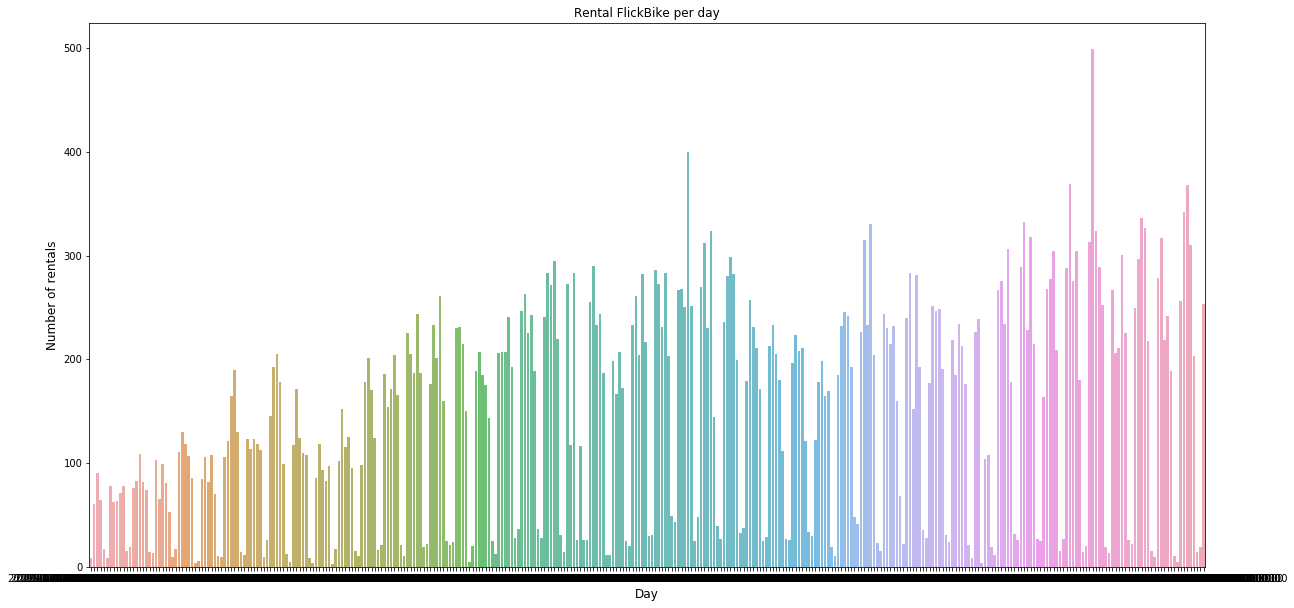

In [6]:
# variable consists of index(date) and values(amount)
group_date = df['date'].groupby(df.date.dt.floor('d')).count()
# group_date = df.groupby(df.date.dt.date)["tripid"].sum() # tripid or bikeid etc?? 

# plot rental per day
plt.figure(figsize=(20,10))
sns.barplot(group_date.index, group_date.values, alpha=0.8)
plt.title('Rental FlickBike per day')
plt.ylabel('Number of rentals', fontsize=12)
plt.xlabel('Day', fontsize=12)
# plt.locator_params(axis='x', nbins=12) # tick values will be places incorrectly, fix this
plt.show()

In [7]:
group_date

date
2019-01-01      8
2019-01-02     61
2019-01-03     90
2019-01-04     64
2019-01-05     17
             ... 
2019-12-05    310
2019-12-06    203
2019-12-07     14
2019-12-08     19
2019-12-09    253
Name: date, Length: 342, dtype: int64

#### Vraag 2: wat is de periodiciteit van deze dataset?

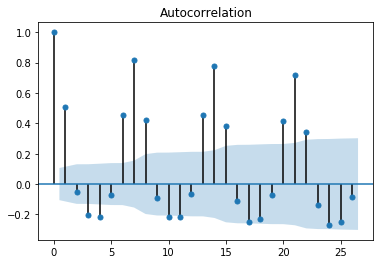

In [8]:
plot_acf(group_date.values)
plt.show()

###### onderbouwing plot

#### Correlation between all columns

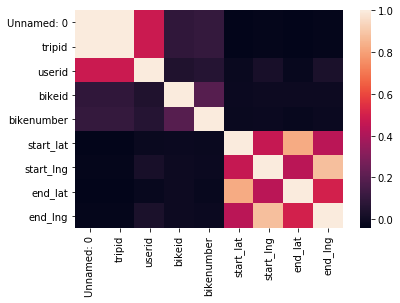

In [9]:
sns.heatmap(df.corr())
plt.show()

#### Add external data for holidays (2019)

---
Source: https://kalender-nederland.nl/feestdagen-2019/ 

In [10]:
national_holidays = pd.read_csv(("/Users/wolfsinem/distributed-processing/bike-rental-flickbike/data/Nationale Feestdagen.csv"))
other_holidays = pd.read_csv(("/Users/wolfsinem/distributed-processing/bike-rental-flickbike/data/Overige Feestdagen.csv"))

In [11]:
all_holidays = pd.concat([national_holidays,other_holidays]).reset_index(drop=True)
all_holidays['Datum'] = pd.to_datetime(all_holidays['Datum'])
all_holidays['Datum'] = all_holidays['Datum'].dt.date

In [12]:
all_holidays

,Feestdag,Datum
0,Nieuwjaarsdag 2019,2019-01-01
1,Bevrijdingsdag 2019,2019-05-05
2,Hemelvaart 2019,2019-05-30
3,Goede vrijdag 2019,2019-04-19
4,1e Paasdag 2019,2019-04-21
5,2e Paasdag 2019,2019-04-22
6,Koningsdag 2019,2019-04-27
7,1e Pinksterdag 2019,2019-06-09
8,2e Pinksterdag 2019,2019-06-10
9,1e Kerstdag 2019,2019-12-25


#### Merge holidays with original dataset 'df'
---

By doing so you can check if bikes were hired on a holiday.
As you can see there were only __1975__ (3.9%) times bikes were hired on a holiday compared to __48402__ (96%) bikes on a regular day.

In [13]:
check_holiday = df['date'].dt.date.isin(all_holidays.Datum)
check_holiday.value_counts(normalize=True)

False    0.960796
True     0.039204
Name: date, dtype: float64

In [14]:
# df[df['date'].dt.date.isin(all_holidays.Datum)].head()

#### Add Dutch weather data from KNMI https://www.knmi.nl/kennis-en-datacentrum/achtergrond/data-ophalen-vanuit-een-script

In [15]:
df_weather = weather_data()
df_weather

,STN,HH,T,T10N,TD
YYYYMMDD,,,,,
2020-03-01,240,1,57,,20
2020-03-01,240,2,51,,19
2020-03-01,240,3,53,,19
2020-03-01,240,4,57,,20
2020-03-01,240,5,54,,21
...,...,...,...,...,...
2020-04-27,240,20,109,,85
2020-04-27,240,21,105,,85
2020-04-27,240,22,99,,79


*data dict zit in file knmi, deze is nog niet helemaal duidelijk, moet nog verder onderzocht worden*

#### Add new column to dataframe with total duration

In [16]:
# start_time = df['start_time']
# end_time = df['end_time']

# delta_duration = end_time - start_time
# df['total_duration'] = delta_duration
# returns duration in days instead of hours/mins/seconds --> have to change later

#### Influence of weather

#### Influence of day of week
---

I will check here if a day in a week has influence on the amount of bikes that are being hired, whereas 0 is __sunday__ and 6 is __saturday__ (check of dit klopt, misschien begint het gewoon vanaf maandag)

In [17]:
day_of_week = df['date'].apply(lambda time: time.dayofweek).value_counts()

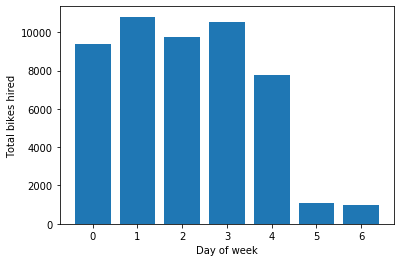

In [18]:
x = day_of_week.index
y = day_of_week.values
plt.bar(x,y)
plt.xlabel('Day of week')
plt.ylabel('Total bikes hired')
plt.show()

#### Influence of hour of day

--- 

I will check here if an hour in a day has influence on the amount of bikes that are being hired.

In [19]:
hour_in_day = df['date'].apply(lambda time: time.hour).value_counts()

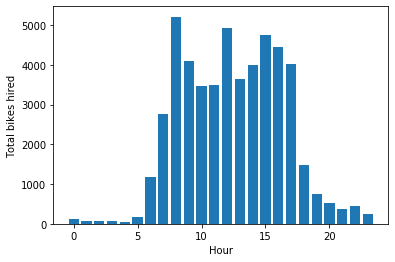

In [20]:
x = hour_in_day.index
y = hour_in_day.values
plt.bar(x,y)
plt.xlabel('Hour')
plt.ylabel('Total bikes hired')
plt.show()

In [21]:
# df['Month'] = df['timeStamp'].apply(lambda time: time.month)
# df['Year'] = df['timeStamp'].apply(lambda t: t.year)
# df['Date'] = df['timeStamp'].apply(lambda t: t.day)